<a href="https://colab.research.google.com/github/fesimaxu/Pandas-Puzzles/blob/main/Analysis_on_NBA_Basketball_Team_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PROCEDURES
### Import python Libraries
### Extracting the Team gamelog Table
### Calculating the Teams performance indicators
### Analysising the Teams with their respective performance indicators
## DESCRIPTION Of DATASET
### A Dataset of National Basketball Association Teams of Los Angeles Lakers, Boston Celtics and Miami Heat Gamelog.
### The Dataset of over 20 games played in 2020/2021 NBA season
### The Gamelog Dataset consists of number of games played,opponents points,Team points, field goal percentage,Turnover,Assists on field goal etc
## Aims of The Analysis on the Dataset
### To determine the best performing team of the season
### To determine the team performance index against opponent during the season

## Importing Python Libraries

In [1]:
import requests
import lxml.html as lh
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup as bs 

In [2]:

import re

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## NBA Basketball Team Results

In [4]:
## 2020-21 Los Angeles Lakers Schedule and Results

Lakers_base_url = "https://www.basketball-reference.com/teams/LAL/2021/gamelog/#tgl_basic::27"

In [5]:
## 2020-21 Boston Celtics Schedule and Results

Celtics_base_url = "https://www.basketball-reference.com/teams/BOS/2021/gamelog/#tgl_basic"

In [6]:
## 2020-21 Miami Heat Schedule and Results

Miami_heat_base_url = "https://www.basketball-reference.com/teams/MIA/2021/gamelog/#tgl_basic"

## Obtaining the NBA Teams Respective Data

In [7]:
Lakers_response = requests.get(Lakers_base_url)
Celtics_response = requests.get(Celtics_base_url)
Miami_heat_response = requests.get(Miami_heat_base_url)

In [8]:
Lakers_response.status_code
Celtics_response.status_code
Miami_heat_response.status_code

200

In [9]:
len(Lakers_response.text)

304739

In [10]:
len(Celtics_response.text)

302597

In [11]:
len(Miami_heat_response.text)

300392

## 2020-21 Los Angeles Lakers NBA Team

In [12]:
## Using xml.html library to extract the text

Lakers_page_content = Lakers_response.text
Lakers_doc = lh.fromstring(Lakers_response.content)
Lakers_tr_elements = Lakers_doc.xpath('//tr')

In [13]:
[len(T) for T in Lakers_tr_elements[:20]]

[6, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41]

In [14]:
#Extracting the column names of the table

Lakers_tr_elements = Lakers_doc.xpath('//tr')
Lakers_col=[]
i=0

for t in Lakers_tr_elements[1]:
            i+=1
            name=t.text_content()
            print('%d:"%s"'%(i,name))
            Lakers_col.append((name,[])),

1:"Rk"
2:"G"
3:"Date"
4:" "
5:"Opp"
6:"W/L"
7:"Tm"
8:"Opp"
9:"FG"
10:"FGA"
11:"FG%"
12:"3P"
13:"3PA"
14:"3P%"
15:"FT"
16:"FTA"
17:"FT%"
18:"ORB"
19:"TRB"
20:"AST"
21:"STL"
22:"BLK"
23:"TOV"
24:"PF"
25:" "
26:"FG"
27:"FGA"
28:"FG%"
29:"3P"
30:"3PA"
31:"3P%"
32:"FT"
33:"FTA"
34:"FT%"
35:"ORB"
36:"TRB"
37:"AST"
38:"STL"
39:"BLK"
40:"TOV"
41:"PF"


## Accessing 2020-21 Los Angeles Lakers Game Log Table

In [15]:
## Extracting the text on each row of table according to its respective column

for j in range(1,len(Lakers_tr_elements)):
    T = Lakers_tr_elements[j]
    
## The number of columns

    if len(T)!=41:
        break
    
    i=0
## Obtaining the text content and appending to its respective column name

    for t in T.iterchildren():
        Lakers_data=t.text_content() 

        if i>0:
        
            try:
                Lakers_data=int(Lakers_data)
            except:
                pass
        
        Lakers_col[i][1].append(Lakers_data)
        
        i+=1

In [16]:
[len(C) for (title,C) in Lakers_col]

[21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21]

In [17]:
## converting the data into a pandas Dataframe

Lakers_Dict={title:column for (title,column) in Lakers_col}
Lakers_df=pd.DataFrame(Lakers_Dict)

## 2020-21 Los Angeles Lakers Game Log Table

In [18]:
pd.set_option('display.max_columns', None)
Lakers_df.head()

,Rk,G,Date,,Opp,W/L,Tm,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF
0,Rk,G,Date,,Opp,W/L,Tm,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF
1,1,1,2020-12-22,,116,L,109,44,93,.473,14,40,.350,14,19,.737,11,40,22,10,3,16,29
2,2,2,2020-12-25,,115,W,138,41,83,.494,13,32,.406,20,26,.769,3,27,20,13,3,9,22
3,3,3,2020-12-27,,91,W,127,38,103,.369,6,35,.171,9,14,.643,17,48,24,11,6,17,24
4,4,4,2020-12-28,,115,L,107,43,92,.467,16,46,.348,13,15,.867,7,45,27,9,6,9,16


In [19]:
Lakers_df.tail()

,Rk,G,Date,,Opp,W/L,Tm,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF
16,16,16,2021-01-21,,106,W,113,44,87,.506,9,28,.321,9,12,.750,5,46,27,5,5,14,18
17,17,17,2021-01-23,,90,W,101,33,84,.393,8,25,.320,16,22,.727,10,45,18,8,1,18,28
18,18,18,2021-01-25,,108,W,115,40,86,.465,9,21,.429,19,22,.864,15,44,19,8,3,17,25
19,19,19,2021-01-27,,107,L,106,41,85,.482,9,25,.360,16,26,.615,7,38,24,10,7,11,24
20,20,20,2021-01-28,,107,L,92,40,87,.460,14,36,.389,13,13,1.000,5,38,27,4,2,8,18


## 2020-21 Boston Celtics NBA Team

In [20]:
Celtics_page_content = Celtics_response.text
Celtics_doc = lh.fromstring(Celtics_response.content)
Celtics_tr_elements = Celtics_doc.xpath('//tr')

In [21]:
Celtics_tr_elements = Celtics_doc.xpath('//tr')
Celtics_col=[]
i=0

for t in Celtics_tr_elements[1]:
    i+=1
    name=t.text_content()
    print('%d:"%s"'%(i,name))
    Celtics_col.append((name,[])),

1:"Rk"
2:"G"
3:"Date"
4:" "
5:"Opp"
6:"W/L"
7:"Tm"
8:"Opp"
9:"FG"
10:"FGA"
11:"FG%"
12:"3P"
13:"3PA"
14:"3P%"
15:"FT"
16:"FTA"
17:"FT%"
18:"ORB"
19:"TRB"
20:"AST"
21:"STL"
22:"BLK"
23:"TOV"
24:"PF"
25:" "
26:"FG"
27:"FGA"
28:"FG%"
29:"3P"
30:"3PA"
31:"3P%"
32:"FT"
33:"FTA"
34:"FT%"
35:"ORB"
36:"TRB"
37:"AST"
38:"STL"
39:"BLK"
40:"TOV"
41:"PF"


In [22]:
[len(T) for T in Celtics_tr_elements[:20]]

[6, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41]

## Accessing 2020-21 Boston Celtics Game Log Table

In [23]:
for j in range(1,len(Celtics_tr_elements)):
    T = Celtics_tr_elements[j]
    
    if len(T)!=41:
        break
    
    i=0
    
    for t in T.iterchildren():
        Celtics_data=t.text_content() 

        if i>0:
        
            try:
                Celtics_data=int(Celtics_data)
            except:
                pass
        
        Celtics_col[i][1].append(Celtics_data)
        
        i+=1

In [24]:
[len(C) for (title,C) in Celtics_col]

[21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21]

In [25]:
Celtics_Dict={title:column for (title,column) in Celtics_col}
Celtics_df=pd.DataFrame(Celtics_Dict)

## 2020-21 Boston Celtics Game Log Table

In [26]:
Celtics_df.head()

,Rk,G,Date,,Opp,W/L,Tm,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF
0,Rk,G,Date,,Opp,W/L,Tm,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF
1,1,1,2020-12-23,,121,W,122,46,90,.511,14,35,.400,15,18,.833,11,52,19,4,6,16,20
2,2,2,2020-12-25,,123,L,95,41,76,.539,15,29,.517,26,31,.839,9,43,21,5,10,15,22
3,3,3,2020-12-27,,108,L,107,45,88,.511,7,26,.269,11,15,.733,8,37,23,11,7,16,20
4,4,4,2020-12-29,,111,W,116,43,84,.512,12,33,.364,13,16,.813,4,36,27,9,5,14,25


In [27]:
Celtics_df.tail()

,Rk,G,Date,,Opp,W/L,Tm,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF
16,16,16,2021-01-25,,103,W,119,41,88,.466,17,39,.436,4,10,.400,9,41,28,4,7,18,16
17,17,17,2021-01-27,,110,L,106,46,82,.561,8,28,.286,10,16,.625,9,46,22,5,4,19,16
18,18,18,2021-01-30,,96,L,95,37,84,.440,9,31,.290,13,19,.684,13,45,20,8,4,14,15
19,19,19,2021-02-02,,107,W,111,38,83,.458,15,37,.405,16,23,.696,6,36,30,9,4,11,23
20,20,20,2021-02-03,,116,L,111,42,92,.457,13,37,.351,19,23,.826,12,44,23,7,2,10,19


## 2020-21 Miami Heat NBA Team

In [28]:
Miami_heat_page_content = Miami_heat_response.text
Miami_heat_doc = lh.fromstring(Miami_heat_response.content)
Miami_heat_tr_elements = Miami_heat_doc.xpath('//tr')

In [29]:
[len(T) for T in Miami_heat_tr_elements[:20]]

[6, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41]

In [30]:
Miami_heat_tr_elements = Miami_heat_doc.xpath('//tr')
Miami_heat_col=[]
i=0

for t in Miami_heat_tr_elements[1]:
    i+=1
    name=t.text_content()
    print('%d:"%s"'%(i,name))
    Miami_heat_col.append((name,[])),

1:"Rk"
2:"G"
3:"Date"
4:" "
5:"Opp"
6:"W/L"
7:"Tm"
8:"Opp"
9:"FG"
10:"FGA"
11:"FG%"
12:"3P"
13:"3PA"
14:"3P%"
15:"FT"
16:"FTA"
17:"FT%"
18:"ORB"
19:"TRB"
20:"AST"
21:"STL"
22:"BLK"
23:"TOV"
24:"PF"
25:" "
26:"FG"
27:"FGA"
28:"FG%"
29:"3P"
30:"3PA"
31:"3P%"
32:"FT"
33:"FTA"
34:"FT%"
35:"ORB"
36:"TRB"
37:"AST"
38:"STL"
39:"BLK"
40:"TOV"
41:"PF"


## Accessing 2020-21 Miami Heat Game Log Table

In [31]:
for j in range(1,len(Miami_heat_tr_elements)):
    T = Miami_heat_tr_elements[j]
    
    if len(T)!=41:
        break
    
    i=0
    
    for t in T.iterchildren():
        Miami_heat_data=t.text_content() 

        if i>0:
        
            try:
                Miami_heat_data=int(Miami_heat_data)
            except:
                pass
        
        Miami_heat_col[i][1].append(Miami_heat_data)
        
        i+=1

In [32]:
[len(C) for (title,C) in Miami_heat_col]

[21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21]

In [33]:
Miami_heat_Dict={title:column for (title,column) in Miami_heat_col}
Miami_heat_df=pd.DataFrame(Miami_heat_Dict)

## 2020-21 Miami Heat Game Log Table

In [34]:
Miami_heat_df.head()

,Rk,G,Date,,Opp,W/L,Tm,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF
0,Rk,G,Date,,Opp,W/L,Tm,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF
1,1,1,2020-12-23,,113,L,107,42,88,.477,10,28,.357,19,30,.633,11,41,23,15,3,17,19
2,2,2,2020-12-25,,98,W,111,31,78,.397,10,35,.286,26,33,.788,11,41,18,8,2,19,20
3,3,3,2020-12-29,,144,L,97,51,92,.554,29,51,.569,13,15,.867,10,45,32,14,2,17,22
4,4,4,2020-12-30,,108,W,119,40,102,.392,16,41,.390,12,13,.923,16,47,26,14,6,13,25


In [35]:
pd.set_option('display.max_columns', None)
Miami_heat_df.tail()

,Rk,G,Date,,Opp,W/L,Tm,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF
16,16,16,2021-01-25,,98,L,85,34,85,.400,11,38,.289,19,22,.864,6,49,24,6,5,7,18
17,17,17,2021-01-27,,109,L,82,42,92,.457,14,43,.326,11,11,1.000,12,49,29,14,4,13,12
18,18,18,2021-01-28,,109,L,105,36,87,.414,17,42,.405,20,22,.909,13,55,22,11,4,12,20
19,19,19,2021-01-30,,104,W,105,41,85,.482,17,45,.378,5,11,.455,12,41,22,12,3,17,21
20,20,20,2021-02-01,,129,L,121,43,95,.453,21,41,.512,22,26,.846,13,44,31,6,4,11,22


## 2020-21 Los Angeles Lakers Team Performance Analysis Indicators

In [36]:
## Total number of Won Over 21 games for 2020-21 season by Los Angeles Lakers team
lakers_wins = len(Lakers_df[Lakers_df["W/L"] == "W"])
lakers_wins

14

In [37]:
## Total number of lose Over 21 games for 2020-21 season by Los Angeles Lakers team
Lakers_lose = len(Lakers_df[Lakers_df["W/L"] == "L"])
Lakers_lose

6

In [38]:
## Total number of points scored Over 21 games for 2020-21 season by Los Angeles Lakers team
Lakers_total_pts = pd.to_numeric(Lakers_df.Tm, errors='coerce').fillna(0).astype(int).sum()
Lakers_total_pts

2256

In [39]:
## Total number of games played for 2020-21 season by Los Angeles Lakers team
Lakers_total_game = len(Lakers_df['G'].value_counts())
Lakers_total_game

21

In [40]:
## Field goal percentage Over 21 games for 2020-21 season by Los Angeles Lakers team
Lakers_Field_goal = pd.to_numeric(Lakers_df['FG'], errors='coerce').fillna(0).astype(int).sum()
Lakers_Field_goal_Amp = pd.to_numeric(Lakers_df['FGA'], errors='coerce').fillna(0).astype(int).sum()
Lakers_Field_goal_percentage = f"{(Lakers_Field_goal/Lakers_Field_goal_Amp) * 100} %" 
Lakers_Field_goal_percentage

'44.924284913067865 %'

In [41]:
## 2 points Field goal percentage Over 21 games for 2020-21 season by Los Angeles Lakers team
## 3 points Field goals calculation
Lakers_3P_Field_goal = pd.to_numeric(Lakers_df['3P'], errors='coerce').fillna(0).astype(int).sum()
Lakers_3PA_Field_goal = pd.to_numeric(Lakers_df['3PA'], errors='coerce').fillna(0).astype(int).sum()
## Free throws Field goals calculation
Lakers_FT_Field_goal = pd.to_numeric(Lakers_df['FT'], errors='coerce').fillna(0).astype(int).sum()
Lakers_FTA_Field_goal = pd.to_numeric(Lakers_df['FTA'], errors='coerce').fillna(0).astype(int).sum()
## 2 points Field goals calculation
Lakers_2P_Field_goal = Lakers_Field_goal - Lakers_FT_Field_goal - Lakers_3P_Field_goal
Lakers_2PA_Field_goal = Lakers_Field_goal_Amp - Lakers_FTA_Field_goal - Lakers_3PA_Field_goal
Lakers_2P_Field_goal_percentage = f"{(Lakers_2P_Field_goal/Lakers_2PA_Field_goal) * 100} %"
Lakers_2P_Field_goal_percentage

'39.33588761174968 %'

In [42]:
## Team Total Turnover percentage Over 21 games for 2020-21 season by Los Angeles Lakers team
Lakers_TOV = pd.to_numeric(Lakers_df['TOV'], errors='coerce').fillna(0).astype(int).sum()
Lakers_Total_TOV = f"{(Lakers_TOV/(Lakers_TOV + 0.44 + Lakers_Field_goal + Lakers_Field_goal_Amp)) * 100} %"
Lakers_Total_TOV

'9.204479982012618 %'

In [43]:
## Team win-lose percentage Over 21 game for 2020-21 season by Los Angeles Lakers team
Lakers_Win_lose_percentage = (lakers_wins/Lakers_total_game) * 100
Lakers_Win_lose_percentage 

66.66666666666666

In [44]:
## Average points per game Over 21 games for 2020-21 season by Los Angeles Lakers team
Lakers_Average_points_per_game = Lakers_total_pts/Lakers_total_game
Lakers_Average_points_per_game 

107.42857142857143

In [45]:
## Average Turnovers per Game Over 21 games for 2020-21 season by Los Angeles Lakers team
Lakers_Average_Turnovers_per_Game = Lakers_TOV/Lakers_total_game
Lakers_Average_Turnovers_per_Game

12.476190476190476

In [46]:
## Assist to Turnovers per Game Over 21 games for 2020-21 season by Los Angeles Lakers team
Lakers_Assist = pd.to_numeric(Lakers_df['AST'], errors='coerce').fillna(0).astype(int).sum()
Lakers_Assist_to_TOV = Lakers_Assist/Lakers_TOV
Lakers_Assist_to_TOV

1.8244274809160306

In [47]:
## Defensive Efficiency Over 21 games for 2020-21 season by Los Angeles Lakers team
Lakers_offensive_rebound = pd.to_numeric(Lakers_df['ORB'], errors='coerce').fillna(0).astype(int).sum()
Lakers_total_opponent_pts = pd.to_numeric(Lakers_df['Opp'], errors='coerce').fillna(0).astype(int).sum()
Lakers_total_possessions = Lakers_Field_goal_Amp - Lakers_offensive_rebound + Lakers_TOV + (0.4*Lakers_FTA_Field_goal)
Lakers_Defensive_Efficiency = Lakers_total_opponent_pts/Lakers_total_possessions
Lakers_Defensive_Efficiency

1.0415630903848065

## 2020-21 Boston Celtics Team Performance Analysis Indicators

In [48]:
## Total number of Won Over 21 games for 2020-21 season by Boston Celtics team
Celtic_wins = len(Celtics_df[Celtics_df["W/L"] == "W"])
Celtic_wins

11

In [49]:
## Total number of lose Over 21 games for 2020-21 season by Boston Celtics team
Celtic_lose = len(Celtics_df[Celtics_df["W/L"] == "L"])
Celtic_lose

9

In [50]:
## Total number of points scored Over 21 games for 2020-21 season by Boston Celtics team
Celtic_total_pts = pd.to_numeric(Celtics_df.Tm, errors='coerce').fillna(0).astype(int).sum()
Celtic_total_pts

2231

In [51]:
## Total number of games played for 2020-21 season by Boston Celtics team
Celtic_total_game = len(Celtics_df['G'].value_counts())
Celtic_total_game

21

In [52]:
## Field goal percentage Over 21 games for 2020-21 season by Boston Celtics team
Celtic_Field_goal = pd.to_numeric(Celtics_df['FG'], errors='coerce').fillna(0).astype(int).sum()
Celtic_Field_goal_Amp = pd.to_numeric(Celtics_df['FGA'], errors='coerce').fillna(0).astype(int).sum()
Celtic_Field_goal_percentage = f"{(Celtic_Field_goal/Celtic_Field_goal_Amp) * 100} %" 
Celtic_Field_goal_percentage

'46.69783752191701 %'

In [53]:
## 2 points Field goal percentage Over 21 games for 2020-21 season by Boston Celtics team
## 3 points Field goals calculation
Celtic_3P_Field_goal = pd.to_numeric(Celtics_df['3P'], errors='coerce').fillna(0).astype(int).sum()
Celtic_3PA_Field_goal = pd.to_numeric(Celtics_df['3PA'], errors='coerce').fillna(0).astype(int).sum()
## Free throws Field goals calculation
Celtic_FT_Field_goal = pd.to_numeric(Celtics_df['FT'], errors='coerce').fillna(0).astype(int).sum()
Celtic_FTA_Field_goal = pd.to_numeric(Celtics_df['FTA'], errors='coerce').fillna(0).astype(int).sum()
## 2 points Field goals calculation
Celtic_2P_Field_goal = Celtic_Field_goal - Celtic_FT_Field_goal - Celtic_3P_Field_goal
Celtic_2PA_Field_goal = Celtic_Field_goal_Amp - Celtic_FTA_Field_goal - Celtic_3PA_Field_goal
Celtic_2P_Field_goal_percentage = f"{(Celtic_2P_Field_goal/Celtic_2PA_Field_goal) * 100} %"
Celtic_2P_Field_goal_percentage

'35.00837520938023 %'

In [54]:
## Team Total Turnover percentage Over 21 games for 2020-21 season by Boston Celtics team
Celtic_TOV = pd.to_numeric(Celtics_df['TOV'], errors='coerce').fillna(0).astype(int).sum()
Celtic_Total_TOV = (Celtic_TOV/(Celtic_TOV + 0.44 + Celtic_Field_goal + Celtic_Field_goal_Amp)) * 100 
Celtic_Total_TOV

10.355515561840283

In [55]:
## Team win-lose percentage Over 21 game for 2020-21 season by Boston Celtics team
Celtic_Win_lose_percentage = (Celtic_wins/Celtic_total_game) * 100
Celtic_Win_lose_percentage 

52.38095238095239

In [56]:
## Average points per game Over 21 games for 2020-21 season by Boston Celtics team
Celtic_Average_points_per_game = Celtic_total_pts/Celtic_total_game
Celtic_Average_points_per_game 

106.23809523809524

In [57]:
## Average Turnovers per Game Over 21 games for 2020-21 season by Boston Celtics team
Celtic_Average_Turnovers_per_Game = Celtic_TOV/Celtic_total_game
Celtic_Average_Turnovers_per_Game

13.80952380952381

In [58]:
## Assist to Turnovers per Game Over 21 games for 2020-21 season by Boston Celtics team
Celtic_Assist = pd.to_numeric(Celtics_df['AST'], errors='coerce').fillna(0).astype(int).sum()
Celtic_Assist_to_TOV = Celtic_Assist/Celtic_TOV
Celtic_Assist_to_TOV

1.5758620689655172

In [59]:
## Defensive Efficiency Over 21 games for 2020-21 season by Boston Celtics team
Celtic_offensive_rebound = pd.to_numeric(Celtics_df['ORB'], errors='coerce').fillna(0).astype(int).sum()
Celtic_total_opponent_pts = pd.to_numeric(Celtics_df['Opp'], errors='coerce').fillna(0).astype(int).sum()
Celtic_total_possessions = Celtic_Field_goal_Amp - Celtic_offensive_rebound + Celtic_TOV + (0.4*Celtic_FTA_Field_goal)
Celtic_Defensive_Efficiency = Celtic_total_opponent_pts/Celtic_total_possessions
Celtic_Defensive_Efficiency

1.0968518147182675

## 2020-21 Miami Heat Team Performance Analysis Indicators

In [60]:
## Total number of Won Over 21 games for 2020-21 season by Miami Heat team
Miami_heat_wins = len(Miami_heat_df[Miami_heat_df["W/L"] == "W"])
Miami_heat_wins

7

In [61]:
## Total number of lose Over 21 games for 2020-21 season by Miami Heat team
Miami_heat_lose = len(Miami_heat_df[Miami_heat_df["W/L"] == "L"])
Miami_heat_lose

13

In [62]:
## Total number of points scored Over 21 games for 2020-21 season by Miami Heat team
Miami_heat_total_pts = pd.to_numeric(Miami_heat_df.Tm, errors='coerce').fillna(0).astype(int).sum()
Miami_heat_total_pts

2137

In [63]:
## Total number of games played for 2020-21 season by Miami Heat team
Miami_heat_total_game = len(Miami_heat_df['G'].value_counts())
Miami_heat_total_game

21

In [64]:
## Field goal percentage Over 21 games for 2020-21 season by Miami Heat team
Miami_heat_Field_goal = pd.to_numeric(Miami_heat_df['FG'], errors='coerce').fillna(0).astype(int).sum()
Miami_heat_Field_goal_Amp = pd.to_numeric(Miami_heat_df['FGA'], errors='coerce').fillna(0).astype(int).sum()
Miami_heat_Field_goal_percentage = f"{(Miami_heat_Field_goal/Miami_heat_Field_goal_Amp) * 100} %" 
Miami_heat_Field_goal_percentage

'45.3416149068323 %'

In [65]:
## 2 points Field goal percentage Over 21 games for 2020-21 season by Miami Heat team
## 3 points Field goals calculation
Miami_heat_3P_Field_goal = pd.to_numeric(Miami_heat_df['3P'], errors='coerce').fillna(0).astype(int).sum()
Miami_heat_3PA_Field_goal = pd.to_numeric(Miami_heat_df['3PA'], errors='coerce').fillna(0).astype(int).sum()
## Free throws Field goals calculation
Miami_heat_FT_Field_goal = pd.to_numeric(Miami_heat_df['FT'], errors='coerce').fillna(0).astype(int).sum()
Miami_heat_FTA_Field_goal = pd.to_numeric(Miami_heat_df['FTA'], errors='coerce').fillna(0).astype(int).sum()
## 2 points Field goals calculation
Miami_heat_2P_Field_goal = Miami_heat_Field_goal - Miami_heat_FT_Field_goal - Miami_heat_3P_Field_goal
Miami_heat_2PA_Field_goal = Miami_heat_Field_goal_Amp - Miami_heat_FTA_Field_goal - Miami_heat_3PA_Field_goal
Miami_heat_2P_Field_goal_percentage = f"{(Miami_heat_2P_Field_goal/Miami_heat_2PA_Field_goal) * 100} %"
Miami_heat_2P_Field_goal_percentage

'30.639097744360903 %'

In [66]:
## Team Total Turnover percentage Over 21 games for 2020-21 season by Miami Heat team
Miami_heat_TOV = pd.to_numeric(Miami_heat_df['TOV'], errors='coerce').fillna(0).astype(int).sum()
Miami_heat_Total_TOV = (Miami_heat_TOV/(Miami_heat_TOV + 0.44 + Miami_heat_Field_goal + Miami_heat_Field_goal_Amp)) * 100 
Miami_heat_Total_TOV

9.840865155632757

In [67]:
## Team win-lose percentage Over 21 game for 2020-21 season by Miami Heat team
Miami_heat_Win_lose_percentage = (Miami_heat_wins/Miami_heat_total_game) * 100
Miami_heat_Win_lose_percentage 

33.33333333333333

In [68]:
## Average points per game Over 21 games for 2020-21 season by Miami Heat team
Miami_heat_Average_points_per_game = Miami_heat_total_pts/Miami_heat_total_game
Miami_heat_Average_points_per_game 

101.76190476190476

In [69]:
## Average Turnovers per Game Over 21 games for 2020-21 season by Miami Heat team
Miami_heat_Average_Turnovers_per_Game = Miami_heat_TOV/Miami_heat_total_game
Miami_heat_Average_Turnovers_per_Game

13.380952380952381

In [70]:
## Assist to Turnovers per Game Over 21 games for 2020-21 season by Miami Heat team
Miami_heat_Assist = pd.to_numeric(Miami_heat_df['AST'], errors='coerce').fillna(0).astype(int).sum()
Miami_heat_Assist_to_TOV = Miami_heat_Assist/Miami_heat_TOV
Miami_heat_Assist_to_TOV

1.8220640569395017

In [71]:
## Defensive Efficiency Over 21 games for 2020-21 season by Miami Heat team
Miami_heat_offensive_rebound = pd.to_numeric(Miami_heat_df['ORB'], errors='coerce').fillna(0).astype(int).sum()
Miami_heat_total_opponent_pts = pd.to_numeric(Miami_heat_df['Opp'], errors='coerce').fillna(0).astype(int).sum()
Miami_heat_total_possessions = Miami_heat_Field_goal_Amp - Miami_heat_offensive_rebound + Miami_heat_TOV + (0.4*Miami_heat_FTA_Field_goal)
Miami_heat_Defensive_Efficiency = Miami_heat_total_opponent_pts/Miami_heat_total_possessions
Miami_heat_Defensive_Efficiency

1.11930628924549

## Analysising the Performance Indicators

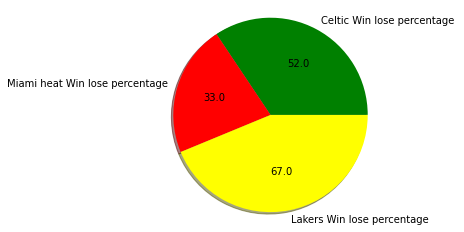

In [72]:
## Win-lose percentage (W-L%) of the NBA Teams
labels = 'Celtic Win lose percentage ', 'Miami heat Win lose percentage', 'Lakers Win lose percentage'
sizes = np.array([52.4, 33.3, 66.7])
colors = ['green', 'red', 'yellow']

def absolute_value(val):
    a  = np.round(val/100.*sizes.sum(), 0)
    return a

plt.pie(sizes, labels=labels, colors=colors,
        autopct=absolute_value, shadow=True)

plt.axis('equal')
plt.show()

## From the data virtualized above ; It can be stated that Los Angeles Lakers have the highest Win-Lose percentage ratio with 67% for the 2020/2021 season over 21 games played

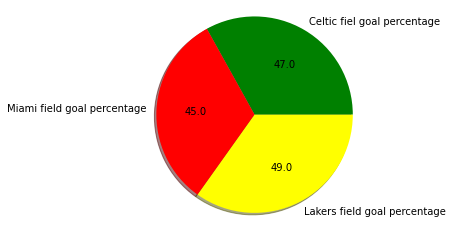

In [73]:
## Field goal percentage (FG%) of the NBA Teams
labels = 'Celtic fiel goal percentage ', 'Miami field goal percentage', 'Lakers field goal percentage'
sizes = np.array([46.7, 45.3, 49.2])
colors = ['green', 'red', 'yellow']

def absolute_value(val):
    a  = np.round(val/100.*sizes.sum(), 0)
    return a

plt.pie(sizes, labels=labels, colors=colors,
        autopct=absolute_value, shadow=True)

plt.axis('equal')
plt.show()

## From the data virtualized above ; It can be stated that Los Angeles Lakers have the highest Field Goal percentage ratio with 49% for the 2020/2021 season over 21 games played

## The Average Points per Game for the Lakers for 2020/2021 season is 107

## The Average Turnovers per Game for the Boston's Celtics State is 13

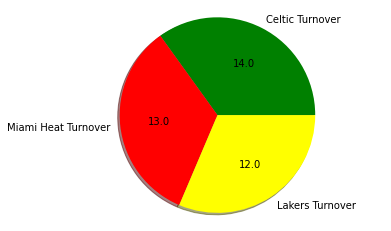

In [74]:
## Turnover per game (TOV) of the NBA Teams
labels = 'Celtic Turnover ', 'Miami Heat Turnover', 'Lakers Turnover'
sizes = np.array([13.8, 13.3, 12.4])
colors = ['green', 'red', 'yellow']

def absolute_value(val):
    a  = np.round(val/100.*sizes.sum(), 0)
    return a

plt.pie(sizes, labels=labels, colors=colors,
        autopct=absolute_value, shadow=True)

plt.axis('equal')
plt.show()

## From the data virtualized above ; It can be stated that Boston Celtics have the highest Turnover ratio with 14 for the 2020/2021 season over 21 games played

## The Two additional indicators analysed is
### a. Assist To Turnover ratio
### b. Defensive Efficiency

### Assist to Turnover ratio was chosen to determine the teams ability on ball control throughout the 21 games period
### Assist to Turnover high value determines that the team have more ball control than their opponents while low Assist to Turnover indicates poor ball control of the team.

### Defensive Efficiency was chosen to determine the team ability to allow opponent team to gain more points against it.
### Defensive Efficiency of every good team is expected to be below 1.0 ,any team with a higher defensive efficiency above 1.0 is termed to have a poor defensive record.

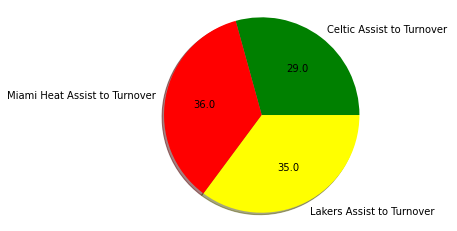

In [75]:
## Assist to Turnover per game (AST/TO) of the NBA Teams
labels = 'Celtic Assist to Turnover ', 'Miami Heat Assist to Turnover', 'Lakers Assist to Turnover'
sizes = np.array([1.5, 1.82, 1.8])
colors = ['green', 'red', 'yellow']

def absolute_value(val):
    a  = np.round(val, 0)
    return a

plt.pie(sizes, labels=labels, colors=colors,
        autopct=absolute_value, shadow=True)

plt.axis('equal')
plt.show()

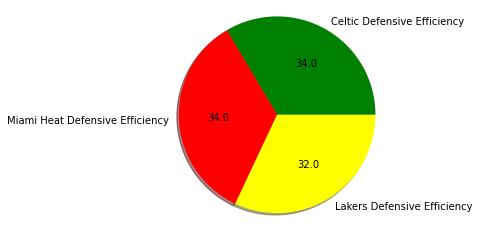

In [76]:
## Defensive Efficiency per game (AST/TO) of the NBA Teams
labels = 'Celtic Defensive Efficiency ', 'Miami Heat Defensive Efficiency', 'Lakers Defensive Efficiency'
sizes = np.array([1.09, 1.12, 1.04])
colors = ['green', 'red', 'yellow']

def absolute_value(val):
    a  = np.round(val, 0)
    return a

plt.pie(sizes, labels=labels, colors=colors,
        autopct=absolute_value, shadow=True)

plt.axis('equal')
plt.show()

## From the Assist to Turnover ratio of 35% and Defensive Efficiency of the NBA Teams Data Virtualized above, it implies that Los Angeles Lakers have a good control of the ball possessions during field plays and a good defensive efficiency 0f 32% compared to the other two teams,It is therefore the best team from the two performance indicators

### The most important performance indicator of the Data is the Win-Lose percentage(W-L%) because it is the performance indicator that summaries all other good indicators and it is the indicator that determines if other performance indicators results in good outcome or not.

### The best team over the 20 games played in 2020/2021 is Los Angeles Lakers because they have the greatest Win-Lose percentage of 67% among the NBA teams which implies that other performance indicators such as good Defensive efficiency of 32&, Turnover 12 and average points per game of 107 points are yielding the required results of winning games and lifting the NBA Trophy at the end of the season.